<a href="https://colab.research.google.com/github/Dheeraj13082004/crop_prediction/blob/main/crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install future

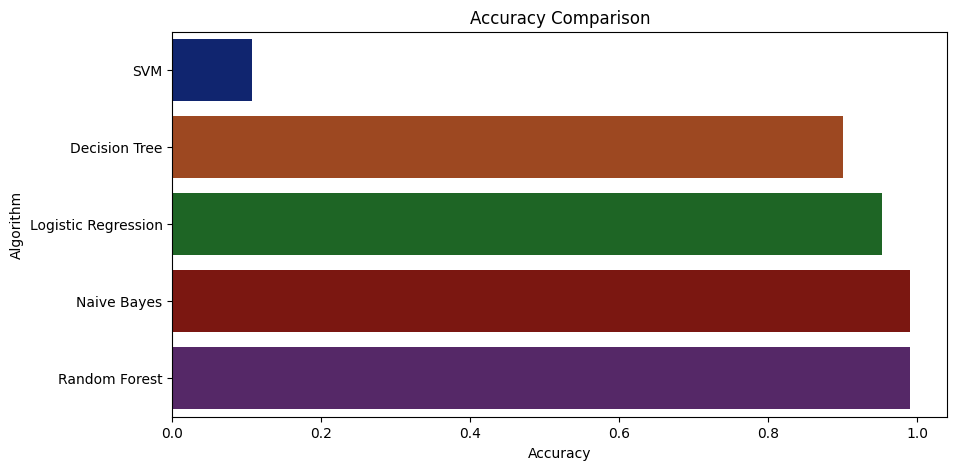

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.10681818181818181
Logistic Regression --> 0.9522727272727273
Random Forest --> 0.990909090909091
Random Forest Prediction: ['jute']
Logistic Regression Prediction: ['jute']
SVM Prediction: ['kidneybeans']
Naive Bayes Prediction: ['jute']
Decision Tree Prediction: ['jute']


In [8]:
from __future__ import print_function
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')

PATH = '/content/Crop_recommendation.csv'
df = pd.read_csv(PATH)

features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size=0.2, random_state=2)

acc = []
model = []

# Decision Tree
DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
DecisionTree.fit(Xtrain, Ytrain)
predicted_values = DecisionTree.predict(Xtest)
acc.append(metrics.accuracy_score(Ytest, predicted_values))
model.append('Decision Tree')

with open('DecisionTree.pkl', 'wb') as DT_Model_pkl:
    pickle.dump(DecisionTree, DT_Model_pkl)

# Naive Bayes
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain, Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
acc.append(metrics.accuracy_score(Ytest, predicted_values))
model.append('Naive Bayes')

with open('NBClassifier.pkl', 'wb') as NB_Model_pkl:
    pickle.dump(NaiveBayes, NB_Model_pkl)

# SVM
SVM = SVC(gamma='auto')
SVM.fit(Xtrain, Ytrain)
predicted_values = SVM.predict(Xtest)
acc.append(metrics.accuracy_score(Ytest, predicted_values))
model.append('SVM')

# Logistic Regression
LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain, Ytrain)
predicted_values = LogReg.predict(Xtest)
acc.append(metrics.accuracy_score(Ytest, predicted_values))
model.append('Logistic Regression')

with open('LogisticRegression.pkl', 'wb') as LR_Model_pkl:
    pickle.dump(LogReg, LR_Model_pkl)

# Random Forest
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain, Ytrain)
predicted_values = RF.predict(Xtest)
acc.append(metrics.accuracy_score(Ytest, predicted_values))
model.append('Random Forest')

with open('RandomForest.pkl', 'wb') as RF_Model_pkl:
    pickle.dump(RF, RF_Model_pkl)

# Visualization
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=model, palette='dark', order=np.array(model)[np.argsort(acc)])
plt.show()

# Display accuracy values
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print(f"{k} --> {v}")

# Make predictions on new data
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
for model, model_name in zip([RF, LogReg, SVM, NaiveBayes, DecisionTree],
                              ['Random Forest', 'Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree']):
    prediction = model.predict(data)
    print(f"{model_name} Prediction: {prediction}")
